# Credit Card Fraud Detection Using Random Forest Classifiers with Python



__Kaggle Dataset Link__ [Click Here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)



### Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Loading the dataset to a Pandas DataFrame

In [2]:
df=pd.read_csv("creditcard.csv")

#### First 5 rows of the dataset

In [3]:
df.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Last 5 rows of the dataset

In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


#### Dataset informations

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Checking the number of missing values in each column

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Distribution of legit transactions & fraudulent transactions

In [7]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

__This Dataset is highly unblanced__

__0__ --> Normal Transaction

__1__ --> fraudulent transaction

#### Separating the data for analysis

In [8]:
legit=df[df.Class == 0]
fraud=df[df.Class == 1]

In [9]:
legit.shape

(284315, 31)

In [10]:
fraud.shape

(492, 31)

#### Statistical measures of the data

In [11]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

#### Compare the values for both transactions

In [13]:
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#### Under-Sampling

__Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions__

__Number of Fraudulent Transactions --> 492__

In [14]:
ligit_sample=legit.sample(n=492)

#### Concatenating two DataFrames

In [15]:
new_dataset=pd.concat([ligit_sample, fraud], axis=0)

In [16]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46089,42634.0,-1.020578,1.229970,1.024556,0.771904,0.319665,-0.345369,0.744662,-0.135471,-0.234736,...,0.102684,0.664270,-0.138886,0.100752,-0.315889,-0.378021,-0.383067,-0.311701,13.96,0
155891,106718.0,1.923345,-0.299254,-0.119863,0.460840,-0.691863,-0.456562,-0.706354,0.036874,2.496660,...,-0.211567,-0.324132,0.373479,-0.129871,-0.485064,-0.979943,0.023543,-0.043619,11.27,0
80428,58483.0,-0.408862,0.698641,-0.041575,-1.192307,2.488696,3.342290,0.106319,0.939319,-0.519958,...,-0.272887,-0.907572,-0.028916,0.982215,-0.030191,0.086193,0.262781,0.115849,9.99,0
152897,97546.0,-6.276653,-2.355485,-2.132629,-0.401797,2.553230,-1.275664,2.253393,-1.861864,3.378672,...,-1.218098,0.415665,-1.103778,0.396549,0.762797,-0.021517,-2.398113,4.674074,125.00,0
141683,84463.0,-0.963389,0.161349,2.183943,-0.106249,-1.318152,1.191421,-1.567975,-1.247449,0.185031,...,1.718765,0.615225,-0.268177,0.120402,-0.373363,0.067984,0.295251,0.169798,59.89,0


In [17]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [18]:
new_dataset["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [19]:
new_dataset.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,91944.282520,-0.103704,-0.053104,-0.031201,0.089512,-0.031984,0.037333,-0.096921,-0.006947,0.039944,...,0.055281,0.029316,-0.014297,-0.062747,0.008445,0.061062,0.009675,-0.013867,0.000881,104.420102
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#### Splitting the data into Features & Targets

In [20]:
X=new_dataset.drop(columns="Class", axis=1)
Y=new_dataset["Class"]

#### Split the data into Training data & Testing Data

In [21]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

print("Train Set : ", X_train.shape, Y_train.shape)
print("Test Set : ", X_test.shape, Y_test.shape)

Train Set :  (787, 30) (787,)
Test Set :  (197, 30) (197,)


### Model Training

#### Random Forest Classifier

In [22]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)

# predictions
y_pred = rfc.predict(X_test)
y_pred[:5]

array([1, 0, 0, 0, 1], dtype=int64)

### Model Evaluation

In [23]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [24]:
n_outliers = len(fraud)
n_errors = (y_pred != Y_test).sum()

print("The Model used is Random Forest classifier:-")

acc= accuracy_score(Y_test,y_pred)
print("The Accuracy is  {}".format(acc))

prec= precision_score(Y_test,y_pred)
print("The Precision is {}".format(prec))

rec= recall_score(Y_test,y_pred)
print("The Recall is {}".format(rec))

f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1))

MCC=matthews_corrcoef(Y_test,y_pred)
print("The Matthews Correlation Coefficient is {}".format(MCC))

The Model used is Random Forest classifier:-
The Accuracy is  0.934010152284264
The Precision is 1.0
The Recall is 0.8673469387755102
The F1-Score is 0.9289617486338798
The Matthews Correlation Coefficient is 0.8755985041814435


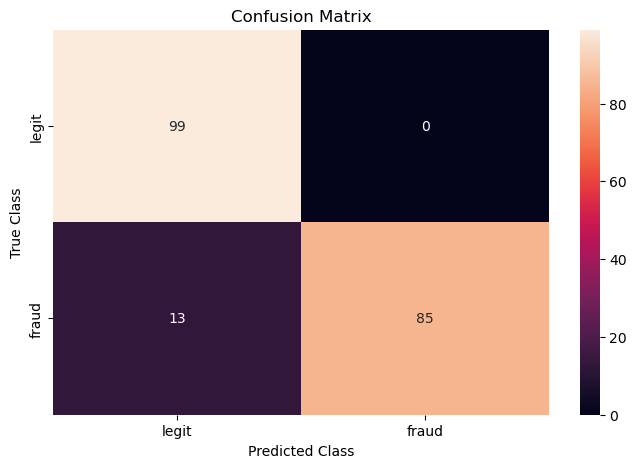

In [25]:
#printing the confusion matrix
LABELS = ['legit', 'fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [26]:
# Run classification metrics
plt.figure(figsize=(9, 7))

print('{}: {}'.format("Random Forest", n_errors))

print("Accuracy Score:",accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Random Forest: 13
Accuracy Score: 0.934010152284264
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        99
           1       1.00      0.87      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



<Figure size 900x700 with 0 Axes>